In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [6]:
data = pd.read_csv("C:\\Users\\PAWAN\\Gitdemo\\Weather-Data-Analysis\\Data\\Project+1+-+Weather+Dataset.csv")

In [7]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [9]:
data.rename(columns={'Temp_C':'Temperature_C', 'Dew Point Temp_C':'Dew_Point_Temp_C', 
       'Wind Speed_km/h':'Wind_Speed_km/h', 'Press_kPa':'Pressure_kPa'},inplace=True)
data.columns


Index(['Date/Time', 'Temperature_C', 'Dew_Point_Temp_C', 'Rel Hum_%',
       'Wind_Speed_km/h', 'Visibility_km', 'Pressure_kPa', 'Weather'],
      dtype='object')

In [10]:
data["Date/Time"]=pd.to_datetime(data["Date/Time"])

In [11]:
data.shape

(8784, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temperature_C     8784 non-null   float64       
 2   Dew_Point_Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind_Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Pressure_kPa      8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [13]:
data.describe()

,Date/Time,Temperature_C,Dew_Point_Temp_C,Rel Hum_%,Wind_Speed_km/h,Visibility_km,Pressure_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


# Column Creation

In [14]:
data["Hour"]= data["Date/Time"].dt.hour
data["Month"]= data["Date/Time"].dt.month
data["Day"]= data["Date/Time"].dt.day

In [15]:
data.head(3)

,Date/Time,Temperature_C,Dew_Point_Temp_C,Rel Hum_%,Wind_Speed_km/h,Visibility_km,Pressure_kPa,Weather,Hour,Month,Day
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1,1


# Checking Skewness the data

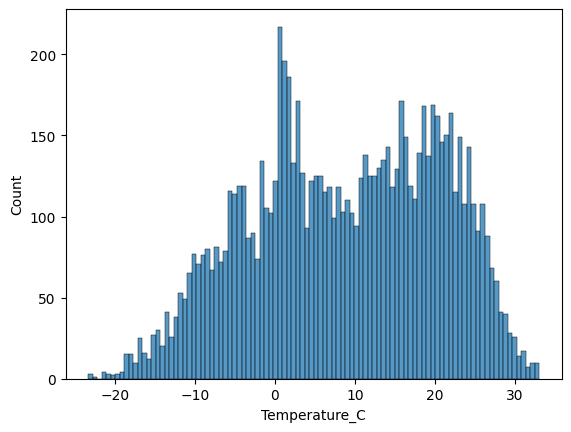

In [26]:
sns.histplot(data, x="Temperature_C", bins=100)
plt.show()

In [16]:
from scipy.stats import skew

In [45]:
data.columns

for i in data.drop(columns=['Date/Time','Weather', 'Hour','Month', 'Day']).columns:
    print(f"{i} : {data[i].skew()}")

Temperature_C : -0.17766634898276745
Dew_Point_Temp_C : -0.31843338608156885
Rel Hum_% : -0.32383026939145887
Wind_Speed_km/h : 0.8713742625776061
Visibility_km : 0.41336159676061063
Pressure_kPa : -0.22992511978286803
